# More on Binary Classification

Credits: Heavily based on [Customer Churn](http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/analyses/churn.ipynb).

Apply the same steps as in the Customer Churn notebook, on the [HR Analytics](https://www.kaggle.com/ludobenistant/hr-analytics) data set.  
Purpose: get familiar with several classification techniques.

## The Dataset: Inspect

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [68]:
employees = pd.read_csv('d:\MyCode\Playground\eMeL\datas\HR_comma_sep.csv')
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
employees.shape

(14999, 10)

In [39]:
employees.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

=> 23% of the employees left during the last 5 years...

### How are the features related to one another?

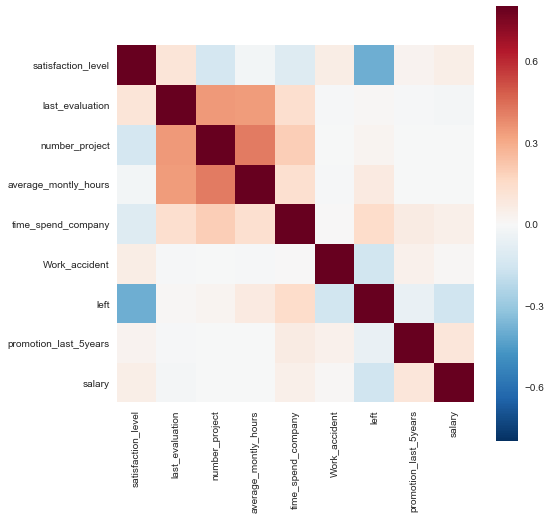

In [53]:
correlation_matrix = employees.corr()
plt.subplots(figsize = (8, 8))

sns.heatmap(correlation_matrix, vmax = .8, square = True)
plt.show()

Notice that the string features are missing from the correlation matrix, i.e. the salary and the department ('sales').

## The Dataset: Preprocess

### Convert string features to numbers

In [69]:
# First the salary... 
employees['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [72]:
employees['salary'] = pd.factorize(employees['salary'])[0]
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [70]:
# ... and then the department.
employees['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [80]:
employees['sales'] = pd.factorize(employees['sales'])[0]
employees.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


### Standardize, [scale](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) data

In [76]:
X = employees.as_matrix().astype(np.float)
X

array([[ 0.38,  0.53,  2.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.8 ,  0.86,  5.  , ...,  0.  ,  0.  ,  1.  ],
       [ 0.11,  0.88,  7.  , ...,  0.  ,  0.  ,  1.  ],
       ..., 
       [ 0.37,  0.53,  2.  , ...,  0.  ,  4.  ,  0.  ],
       [ 0.11,  0.96,  6.  , ...,  0.  ,  4.  ,  0.  ],
       [ 0.37,  0.52,  2.  , ...,  0.  ,  4.  ,  0.  ]])

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = employees['left']
print("Feature space holds %d observations and %d features" % X.shape)
print("Unique target labels: ", np.unique(y))

Feature space holds 14999 observations and 10 features
Unique target labels:  [0 1]
